In [1]:
import os, sys
# Reference: https://stackoverflow.com/questions/34478398/import-local-function-from-a-module-housed-in-another-directory-with-relative-im
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from data.generated.generated_data import get_noisy_nonlinear_with_non_noisy_labels
from data.faces.faces_data import get_faces_dataset
import common_grid_search_analysis
import TrainingCurves

import numpy as np
import pandas  as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

GS_FILE_NAME_PREFIX = "Analysis_Data/NOISY_NONLINEAR_NN_DATA"

PLOT_SAVE_LOCATION = "Figures/"
ALGO = "Neural Network"
DATASET = "Noisy Non-Linear"
GLOBAL_FIG_COUNTER = 0

default_title = "{} Default Learning Curve\n Data Set: {}".format(ALGO, DATASET)
final_title = "{} Final Tuning Learning Curve\n Data Set: {}".format(ALGO, DATASET)

ylim=(0.5, 1.0)

In [2]:
import NeuralNetworks.common_NN as common_NN
X_train, X_test, y_train, y_test, y_test_non_noisy = get_noisy_nonlinear_with_non_noisy_labels()
num_features = X_train.shape[1]

In [3]:
# Start with Learning Curve on Default Classifier
default_train_sizes, default_train_scores, default_test_scores, default_fit_times, default_score_times\
= TrainingCurves.perform_learning_curve(MLPClassifier(), X_train, y_train, "accuracy")

/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/hom

/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/hom

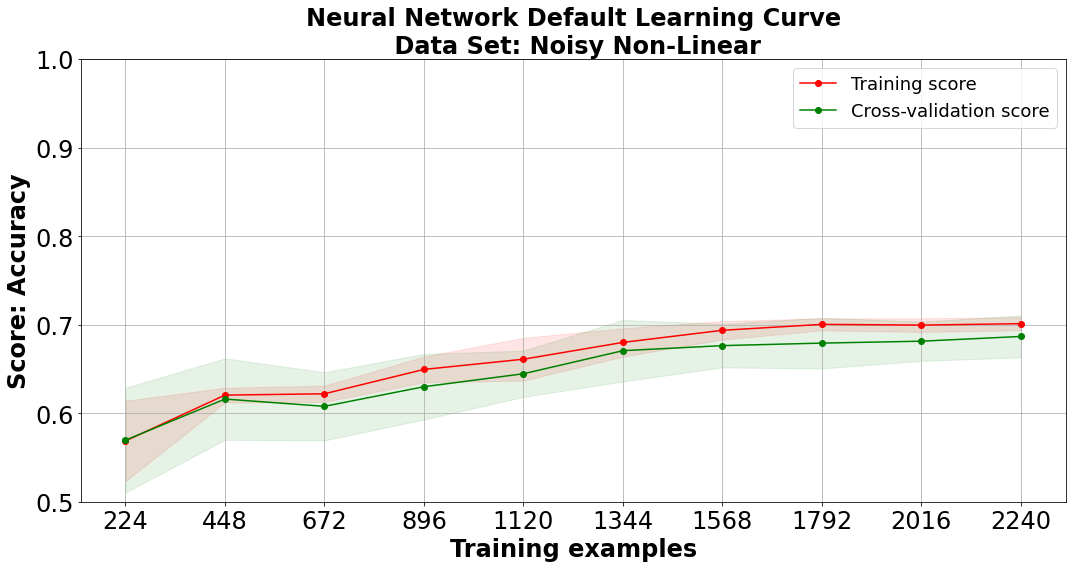

In [4]:
TrainingCurves.plot_learning_curve(default_train_scores, default_test_scores, default_train_sizes, default_title, ylim=ylim)

Running Epochs: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 27

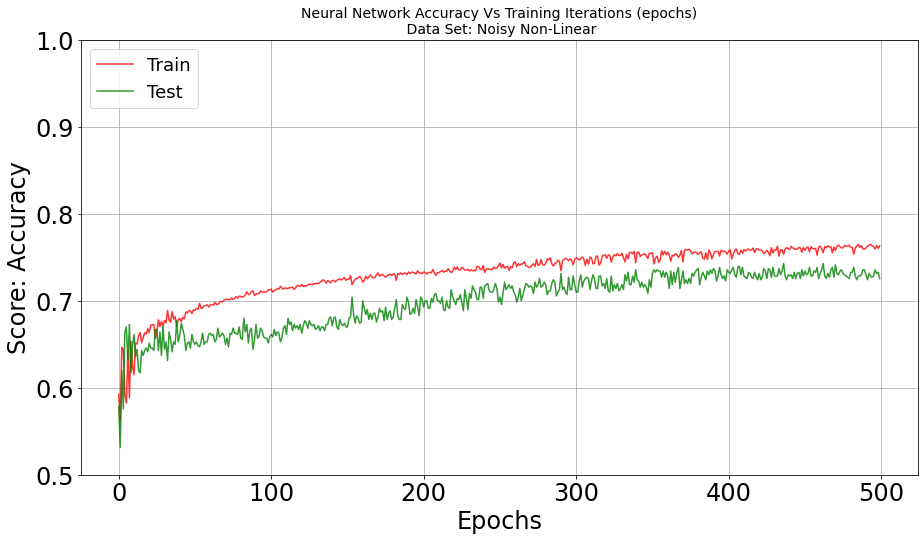

In [5]:
def loss_curve(X_train, y_train, mlp, N_EPOCHS=500, N_BATCH=64):
    # https://stackoverflow.com/questions/46912557/is-it-possible-to-get-test-scores-for-each-iteration-of-mlpclassifier
    N_TRAIN_SAMPLES = X_train.shape[0]
    N_CLASSES = np.unique(y_train)

    scores_train = []
    scores_test = []

    # EPOCH
    epoch = 0
    print("Running Epochs: ", end='')
    while epoch < N_EPOCHS:
        print(epoch, end=' ')
        # SHUFFLING
        random_perm = np.random.permutation(X_train.shape[0])
        mini_batch_index = 0
        while True:
            # MINI-BATCH
            indices = random_perm[mini_batch_index:mini_batch_index + N_BATCH]
            t = X_train[indices]
            x = y_train[indices]
            mlp.partial_fit(X_train[indices], y_train[indices], classes=N_CLASSES)
            mini_batch_index += N_BATCH

            if mini_batch_index >= N_TRAIN_SAMPLES:
                break

        # SCORE TRAIN
        scores_train.append(mlp.score(X_train, y_train))

        # SCORE TEST
        scores_test.append(mlp.score(X_test, y_test))

        epoch += 1
    print()
    return scores_train, scores_test

def plot_loss_curve(scores_train, scores_test, ALGO, DATASET, ylim, legend_loc="upper left"):
    title_fontsize = 24
    fontsize = 24
    legend_fontsize = 18
    
    plt.xticks(fontsize=fontsize)
    plt.yticks(fontsize=fontsize)
    plt.rcParams["figure.figsize"] = (15,8)

    title = "{} Accuracy Vs Training Iterations (epochs)\n Data Set: {}".format(ALGO, DATASET)

    plt.plot(scores_train, color='red', alpha=0.8, label='Train')
    plt.plot(scores_test, color='green', alpha=0.8, label='Test')
    plt.title(title, fontsize=14)
    plt.xlabel('Epochs', fontsize=fontsize)
    plt.ylabel("Score: Accuracy", fontsize=fontsize)
    plt.legend(loc=legend_loc, fontsize=legend_fontsize)
    plt.grid()
    plt.ylim(ylim)
    plt.show()


scores_train, scores_test = loss_curve(np.array(X_train), np.array(y_train), MLPClassifier(), N_BATCH=44)
plot_loss_curve(scores_train, scores_test, ALGO, DATASET, ylim=ylim)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of 100 | elapsed:    1.2s remaining:   58.5s
[Parallel(n_jobs=-1)]: Done  13 out of 100 | elapsed:    4.1s remaining:   27.6s
[Parallel(n_jobs=-1)]: Done  24 out of 100 | elapsed:    6.7s remaining:   21.1s
[Parallel(n_jobs=-1)]: Done  35 out of 100 | elapsed:    9.2s remaining:   17.0s
[Parallel(n_jobs=-1)]: Done  46 out of 100 | elapsed:   12.0s remaining:   14.1s
[Parallel(n_jobs=-1)]: Done  57 out of 100 | elapsed:   14.2s remaining:   10.7s
[Parallel(n_jobs=-1)]: Done  68 out of 100 | elapsed:   16.6s remaining:    7.8s
[Parallel(n_jobs=-1)]: Done  79 out of 100 | elapsed:   19.3s remaining:    5.1s
[Parallel(n_jobs=-1)]: Done  90 out of 100 | elapsed:   21.8s remaining:    2.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   24.4s finished


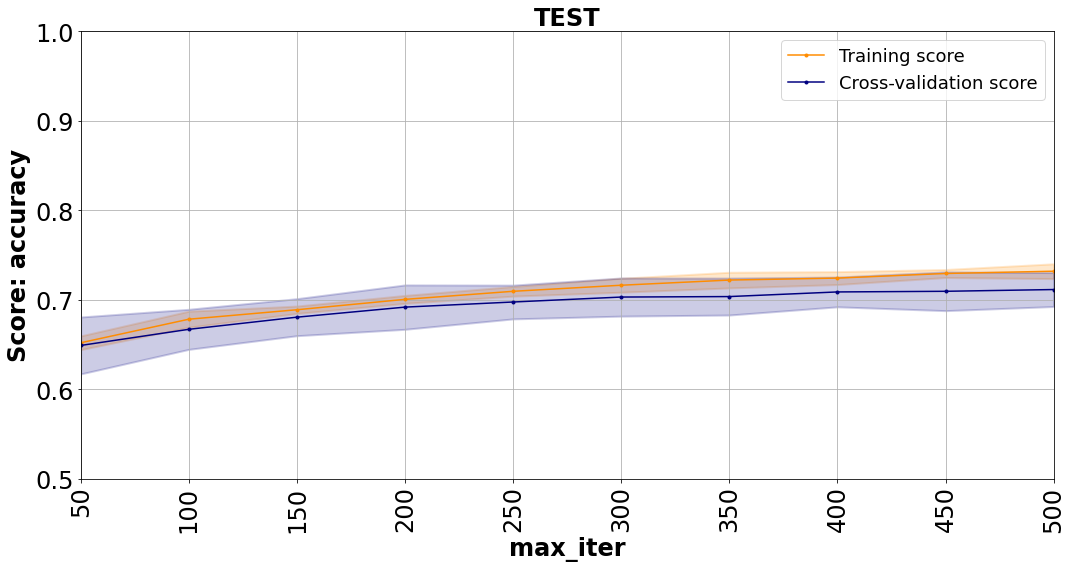

In [6]:
max_iter=[i for i in range(50, 550, 50)]
default_parameters = {}

train_scores_mean, train_scores_std, test_scores_mean, test_scores_std = TrainingCurves.perform_validation_curve(MLPClassifier(), X_train, y_train, 'max_iter', max_iter, 'accuracy', cv=TrainingCurves.get_cv(), verbose=10)
TrainingCurves.plot_validation_curve(train_scores_mean, train_scores_std, test_scores_mean, test_scores_std, "max_iter", max_iter, title="TEST", scoring="accuracy", tick_spacing=1, rotation='vertical', ylim=ylim)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of 160 | elapsed:    6.7s remaining:  2.1min
[Parallel(n_jobs=-1)]: Done  25 out of 160 | elapsed:   15.9s remaining:  1.4min
[Parallel(n_jobs=-1)]: Done  42 out of 160 | elapsed:   24.8s remaining:  1.2min
[Parallel(n_jobs=-1)]: Done  59 out of 160 | elapsed:   34.9s remaining:   59.8s
[Parallel(n_jobs=-1)]: Done  76 out of 160 | elapsed:   44.0s remaining:   48.6s
[Parallel(n_jobs=-1)]: Done  93 out of 160 | elapsed:   53.3s remaining:   38.4s
[Parallel(n_jobs=-1)]: Done 110 out of 160 | elapsed:  1.1min remaining:   30.5s
[Parallel(n_jobs=-1)]: Done 127 out of 160 | elapsed:  1.3min remaining:   19.9s
[Parallel(n_jobs=-1)]: Done 144 out of 160 | elapsed:  1.4min remaining:    9.7s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:  1.6min finished


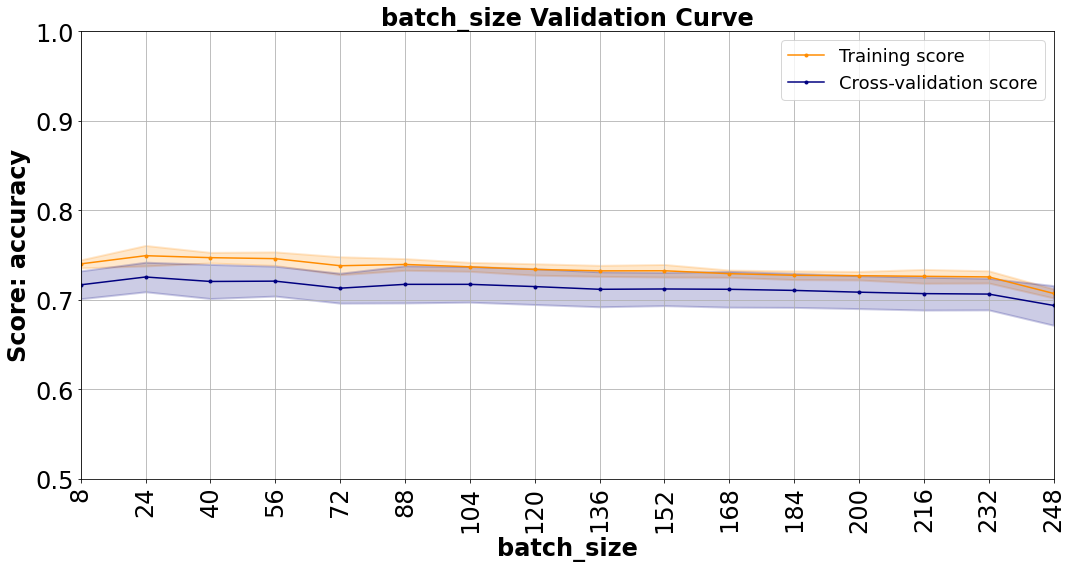

In [7]:
batch_size = [i for i in range(8, 256, 16)]
default_parameters = {'max_iter': 400}

train_scores_mean, train_scores_std, test_scores_mean, test_scores_std = TrainingCurves.perform_validation_curve(MLPClassifier(**default_parameters), X_train, y_train, 'batch_size', batch_size, 'accuracy', cv=TrainingCurves.get_cv(), verbose=10)
TrainingCurves.plot_validation_curve(train_scores_mean, train_scores_std, test_scores_mean, test_scores_std, "batch_size", batch_size, title="batch_size Validation Curve", scoring="accuracy", tick_spacing=1, rotation='vertical', ylim=ylim)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of  40 | elapsed:    0.7s remaining:   27.2s
[Parallel(n_jobs=-1)]: Done   6 out of  40 | elapsed:    1.3s remaining:    7.3s
[Parallel(n_jobs=-1)]: Done  11 out of  40 | elapsed:    2.6s remaining:    6.8s
[Parallel(n_jobs=-1)]: Done  16 out of  40 | elapsed:    3.6s remaining:    5.4s
[Parallel(n_jobs=-1)]: Done  21 out of  40 | elapsed:    5.0s remaining:    4.5s
[Parallel(n_jobs=-1)]: Done  26 out of  40 | elapsed:    6.7s remaining:    3.6s
[Parallel(n_jobs=-1)]: Done  31 out of  40 | elapsed:    7.5s remaining:    2.2s
[Parallel(n_jobs=-1)]: Done  36 out of  40 | elapsed:    9.1s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   11.4s finished


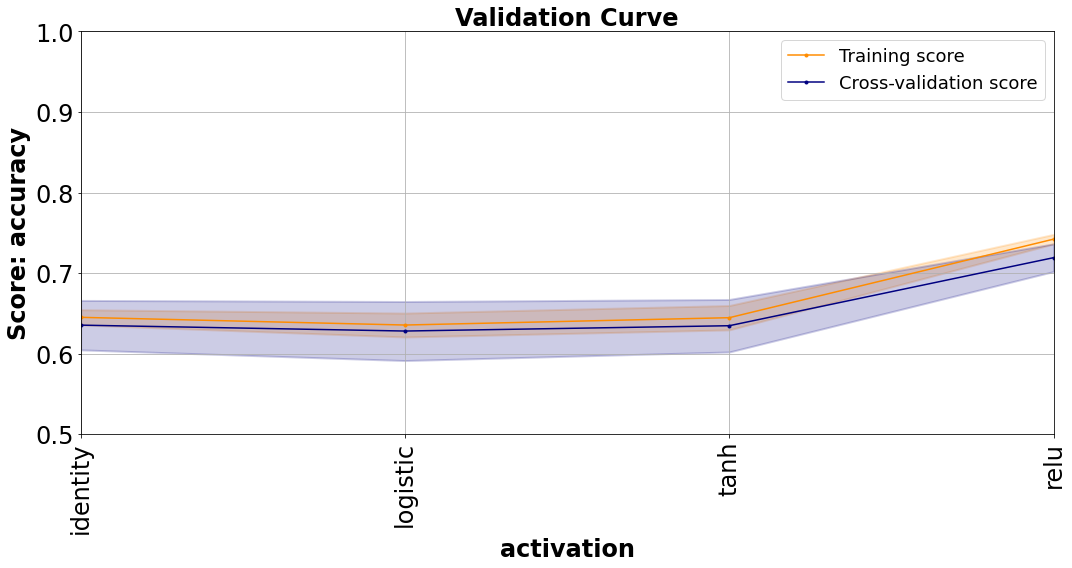

In [8]:
activation = ['identity', 'logistic', 'tanh', 'relu']
default_parameters = {"batch_size": 64, "max_iter": 400}

train_scores_mean, train_scores_std, test_scores_mean, test_scores_std = TrainingCurves.perform_validation_curve(MLPClassifier(**default_parameters), X_train, y_train, 'activation', activation, 'accuracy', cv=TrainingCurves.get_cv(), verbose=10)
TrainingCurves.plot_validation_curve(train_scores_mean, train_scores_std, test_scores_mean, test_scores_std, "activation", activation, title="Validation Curve", scoring="accuracy", tick_spacing=1, rotation='vertical', ylim=ylim)


In [9]:
learning_rate_init=[i for i in np.arange(0.0005, 0.0355, 0.0005)]

train_scores_mean, train_scores_std, test_scores_mean, test_scores_std = \
TrainingCurves.perform_validation_curve(MLPClassifier(**default_parameters), X_train, y_train, "learning_rate_init", learning_rate_init, 'accuracy', cv=TrainingCurves.get_cv(), verbose=10)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  62 out of 700 | elapsed:   16.9s remaining:  2.9min
[Parallel(n_jobs=-1)]: Done 133 out of 700 | elapsed:   32.2s remaining:  2.3min
[Parallel(n_jobs=-1)]: Done 204 out of 700 | elapsed:   49.4s remaining:  2.0min
[Parallel(n_jobs=-1)]: Done 275 out of 700 | elapsed:  1.1min remaining:  1.7min
[Parallel(n_jobs=-1)]: Done 346 out of 700 | elapsed:  1.4min remaining:  1.4min
[Parallel(n_jobs=-1)]: Done 417 out of 700 | elapsed:  1.7min remaining:  1.1min
[Parallel(n_jobs=-1)]: Done 488 out of 700 | elapsed:  1.9min remaining:   50.8s
[Parallel(n_jobs=-1)]: Done 559 out of 700 | elapsed:  2.2min remaining:   33.7s
[Parallel(n_jobs=-1)]: Done 630 out of 700 | elapsed:  2.5min remaining:   16.8s
[Parallel(n_jobs=-1)]: Done 700 out of 700 | elapsed:  2.8min finished


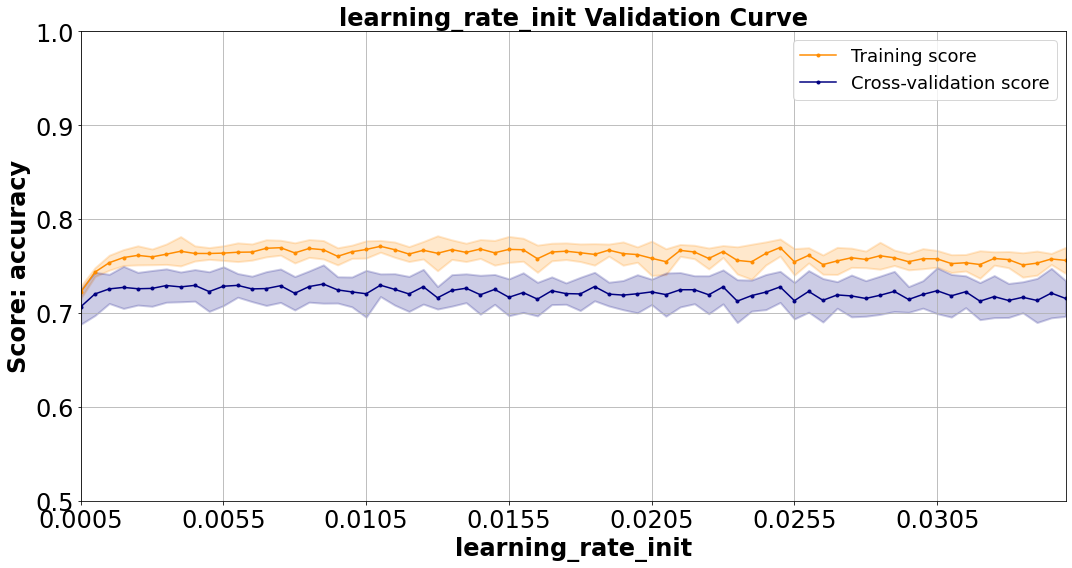

In [10]:
TrainingCurves.plot_validation_curve(train_scores_mean, train_scores_std, test_scores_mean, test_scores_std, "learning_rate_init", learning_rate_init, title="learning_rate_init Validation Curve", scoring="accuracy", tick_spacing=10, ylim=ylim)


In [11]:
default_parameters = {"batch_size": 64, "max_iter": 400, 'learning_rate_init': 0.00165}

In [30]:
import pickle

num_nodes_per_layer = [i for i in range(1, 100, 2)]
num_hidden_layers = [i for i in range(1, 5, 1)]

hidden_layer_sizes = []
for num_layers in num_hidden_layers:
    for num_nodes in num_nodes_per_layer:
        tmp_hl = []
        for i in range(num_layers):
            tmp_hl.append(num_nodes)
        hidden_layer_sizes.append(tmp_hl)


hidden_layer_sizes
string_hidden_layer_size = []
for i in hidden_layer_sizes:
    temp = ""
    for ii in i:
        temp += (str(ii) + " ,")
    temp=temp[:-2]
    string_hidden_layer_size.append(temp)


temp_file_name = 'temp_NN_val_score_NNL_small_hidden_layer_range'
default_parameters = {"batch_size": 64, "max_iter": 400, 'learning_rate_init': 0.00165}

for key, value in default_parameters.items():
    temp_file_name += "_{}={}".format(key, str(value))
temp_file_name += ".pickle"


if(os.path.isfile(temp_file_name)):
    print("Warning not running using: ", temp_file_name)
    with open(temp_file_name, 'rb') as handle:
        train_scores_mean, train_scores_std, test_scores_mean, test_scores_std = pickle.load(handle)
else:
    train_scores_mean, train_scores_std, test_scores_mean, test_scores_std = TrainingCurves.perform_validation_curve(MLPClassifier(**default_parameters), X_train, y_train, 'hidden_layer_sizes', hidden_layer_sizes, 'accuracy', cv=TrainingCurves.get_cv(), verbose=10)
    with open(temp_file_name, 'wb') as handle:
        pickle.dump((train_scores_mean, train_scores_std, test_scores_mean, test_scores_std), handle, protocol=pickle.HIGHEST_PROTOCOL)



Warning not running using:  temp_NN_val_score_NNL_small_hidden_layer_range_batch_size=64_max_iter=400_learning_rate_init=0.00165.pickle


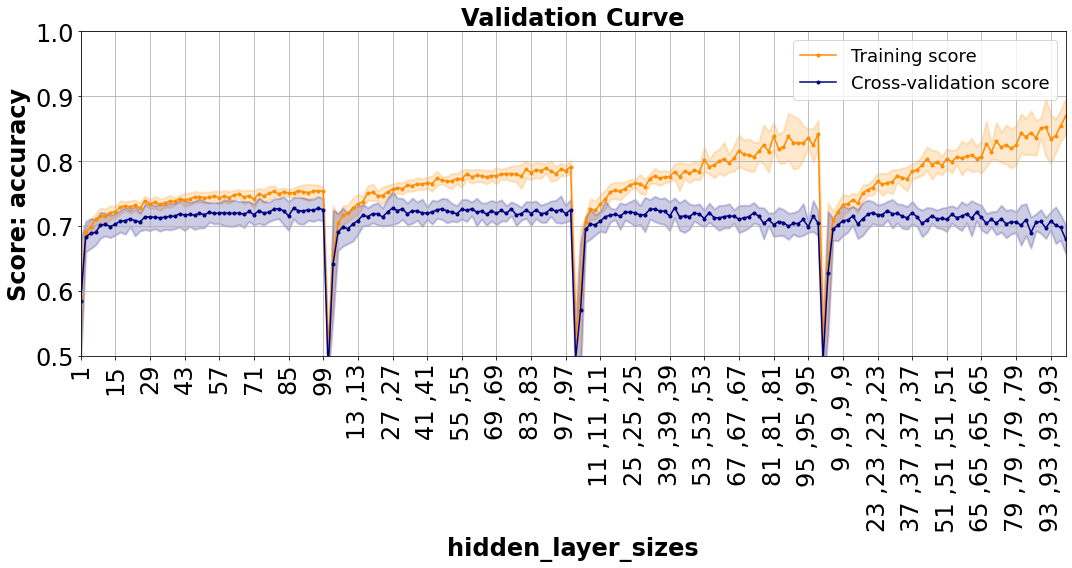

In [13]:
TrainingCurves.plot_validation_curve(train_scores_mean, train_scores_std, test_scores_mean, test_scores_std, "hidden_layer_sizes", string_hidden_layer_size, title="Validation Curve", scoring="accuracy", tick_spacing=7, rotation='vertical', ylim=ylim)

In [14]:
import pickle

num_nodes_per_layer = [i for i in range(10, 150, 10)]
num_hidden_layers = [i for i in range(1, 4, 1)]

hidden_layer_sizes = []
for num_layers in num_hidden_layers:
    for num_nodes in num_nodes_per_layer:
        tmp_hl = []
        for i in range(num_layers):
            tmp_hl.append(num_nodes)
        hidden_layer_sizes.append(tmp_hl)


hidden_layer_sizes
string_hidden_layer_size = []
for i in hidden_layer_sizes:
    temp = ""
    for ii in i:
        temp += (str(ii) + " ,")
    temp=temp[:-2]
    string_hidden_layer_size.append(temp)

temp_file_name = 'temp_NN_val_score_NNL_GS_hidden_layer_range.pickle'

if(os.path.isfile(temp_file_name)):
    print("Warning not running using: ", temp_file_name)
    with open(temp_file_name, 'rb') as handle:
        train_scores_mean, train_scores_std, test_scores_mean, test_scores_std = pickle.load(handle)
else:
    train_scores_mean, train_scores_std, test_scores_mean, test_scores_std = TrainingCurves.perform_validation_curve(MLPClassifier(**default_parameters), X_train, y_train, 'hidden_layer_sizes', hidden_layer_sizes, 'accuracy', cv=TrainingCurves.get_cv(), n_jobs=-1, verbose=10)
    with open(temp_file_name, 'wb') as handle:
        pickle.dump((train_scores_mean, train_scores_std, test_scores_mean, test_scores_std), handle, protocol=pickle.HIGHEST_PROTOCOL)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 out of 420 | elapsed:   24.8s remaining:  4.7min
[Parallel(n_jobs=-1)]: Done  77 out of 420 | elapsed:   57.5s remaining:  4.3min
[Parallel(n_jobs=-1)]: Done 120 out of 420 | elapsed:  1.5min remaining:  3.8min
[Parallel(n_jobs=-1)]: Done 163 out of 420 | elapsed:  2.1min remaining:  3.3min
[Parallel(n_jobs=-1)]: Done 206 out of 420 | elapsed:  2.6min remaining:  2.7min
[Parallel(n_jobs=-1)]: Done 249 out of 420 | elapsed:  3.1min remaining:  2.2min
[Parallel(n_jobs=-1)]: Done 292 out of 420 | elapsed:  3.7min remaining:  1.6min
[Parallel(n_jobs=-1)]: Done 335 out of 420 | elapsed:  4.3min remaining:  1.1min
[Parallel(n_jobs=-1)]: Done 378 out of 420 | elapsed:  4.9min remaining:   32.4s
[Parallel(n_jobs=-1)]: Done 420 out of 420 | elapsed:  5.6min finished


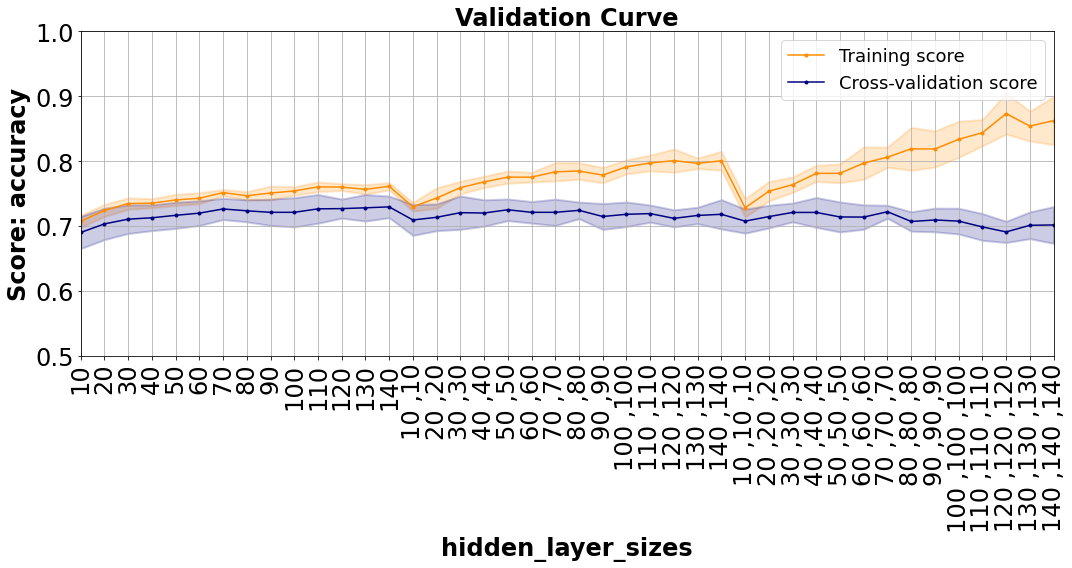

In [15]:
TrainingCurves.plot_validation_curve(train_scores_mean, train_scores_std, test_scores_mean, test_scores_std, "hidden_layer_sizes", string_hidden_layer_size, title="Validation Curve", scoring="accuracy", tick_spacing=1, rotation='vertical', ylim=ylim)

In [16]:
import pickle

num_nodes_per_layer = [i for i in range(10, 150, 10)]
num_hidden_layers = [i for i in range(1, 4, 1)]

hidden_layer_sizes = []
for num_layers in num_hidden_layers:
    for num_nodes in num_nodes_per_layer:
        tmp_hl = []
        for i in range(num_layers):
            tmp_hl.append(num_nodes)
        hidden_layer_sizes.append(tmp_hl)


hidden_layer_sizes
string_hidden_layer_size = []
for i in hidden_layer_sizes:
    temp = ""
    for ii in i:
        temp += (str(ii) + " ,")
    temp=temp[:-2]
    string_hidden_layer_size.append(temp)

temp_file_name = 'temp_NN_val_score_NNL_GS_hidden_layer_range_logistic.pickle'
default_parameters = {"batch_size": 64, "max_iter": 400, 'learning_rate_init': 0.00165, 'activation':'logistic'}

if(os.path.isfile(temp_file_name)):
    print("Warning not running using: ", temp_file_name)
    with open(temp_file_name, 'rb') as handle:
        train_scores_mean, train_scores_std, test_scores_mean, test_scores_std = pickle.load(handle)
else:
    train_scores_mean, train_scores_std, test_scores_mean, test_scores_std = TrainingCurves.perform_validation_curve(MLPClassifier(**default_parameters), X_train, y_train, 'hidden_layer_sizes', hidden_layer_sizes, 'accuracy', cv=TrainingCurves.get_cv(), n_jobs=-1, verbose=10)
    with open(temp_file_name, 'wb') as handle:
        pickle.dump((train_scores_mean, train_scores_std, test_scores_mean, test_scores_std), handle, protocol=pickle.HIGHEST_PROTOCOL)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 out of 420 | elapsed:   11.2s remaining:  2.1min
[Parallel(n_jobs=-1)]: Done  77 out of 420 | elapsed:   26.6s remaining:  2.0min
[Parallel(n_jobs=-1)]: Done 120 out of 420 | elapsed:   43.9s remaining:  1.8min
[Parallel(n_jobs=-1)]: Done 163 out of 420 | elapsed:  1.0min remaining:  1.6min
[Parallel(n_jobs=-1)]: Done 206 out of 420 | elapsed:  1.3min remaining:  1.3min
[Parallel(n_jobs=-1)]: Done 249 out of 420 | elapsed:  1.5min remaining:  1.0min
[Parallel(n_jobs=-1)]: Done 292 out of 420 | elapsed:  1.8min remaining:   47.3s
[Parallel(n_jobs=-1)]: Done 335 out of 420 | elapsed:  2.1min remaining:   32.1s
[Parallel(n_jobs=-1)]: Done 378 out of 420 | elapsed:  2.4min remaining:   16.0s
[Parallel(n_jobs=-1)]: Done 420 out of 420 | elapsed:  2.7min finished


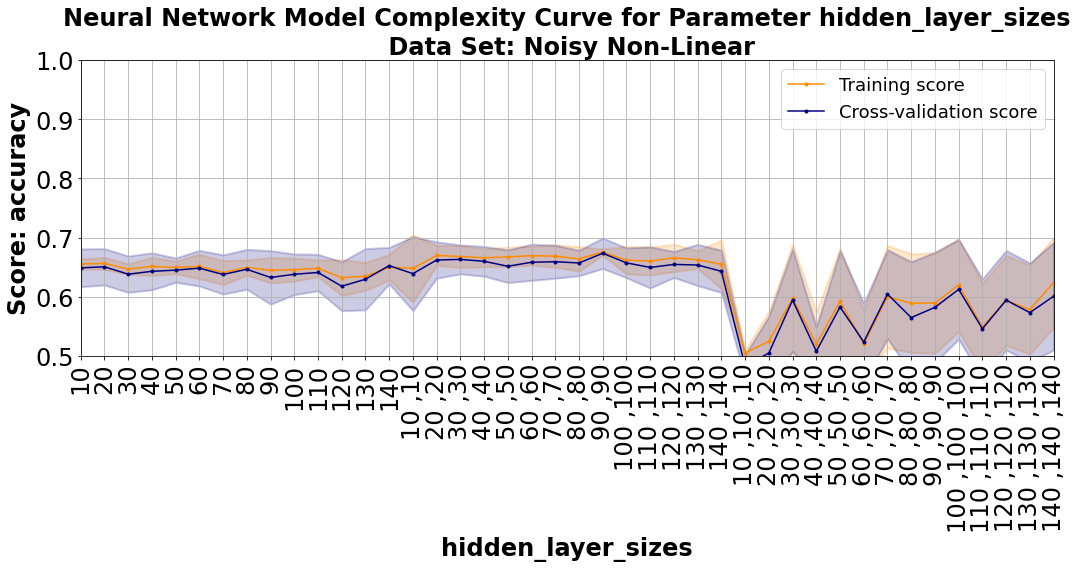

In [17]:
title = '{} Model Complexity Curve for Parameter hidden_layer_sizes\n Data Set: {}'.format(ALGO, DATASET)

TrainingCurves.plot_validation_curve(train_scores_mean, train_scores_std, test_scores_mean, test_scores_std, "hidden_layer_sizes", string_hidden_layer_size, title=title, scoring="accuracy", tick_spacing=1, rotation='vertical', ylim=ylim)

In [18]:
num_nodes_per_layer = [i for i in range(10, 150, 10)]
num_hidden_layers = [i for i in range(1, 4, 1)]

hidden_layer_sizes = []
for num_layers in num_hidden_layers:
    for num_nodes in num_nodes_per_layer:
        tmp_hl = []
        for i in range(num_layers):
            tmp_hl.append(num_nodes)
        hidden_layer_sizes.append(tmp_hl)


hidden_layer_sizes
string_hidden_layer_size = []
for i in hidden_layer_sizes:
    temp = ""
    for ii in i:
        temp += (str(ii) + " ,")
    temp=temp[:-2]
    string_hidden_layer_size.append(temp)
    
learning_rate_init=[i for i in np.arange(0.0005, 0.02, 0.0005)]

parameters = {'learning_rate_init': learning_rate_init, 'hidden_layer_sizes': hidden_layer_sizes}

base_parameters={'batch_size': 64, 'max_iter':400}
gs = common_NN.perform_grid_search(parameters, X_train, y_train, scoring='accuracy', GS_FILE_NAME_PREFIX=GS_FILE_NAME_PREFIX, default_parameters=base_parameters, n_jobs=2)

gs_results = gs

NOT performing Grid Search


Plot saved as:  Figures/Noisy_Non-Linear_Neural Network_GS_ModelComplexity_hidden_layer_sizes_learning_rate_init.png


/home/intuision/Documents/richard/SupervisedLearning_Project_Code/common_grid_search_analysis.py:243: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x = np.array(np.array(param_values[plot_param])[mask])


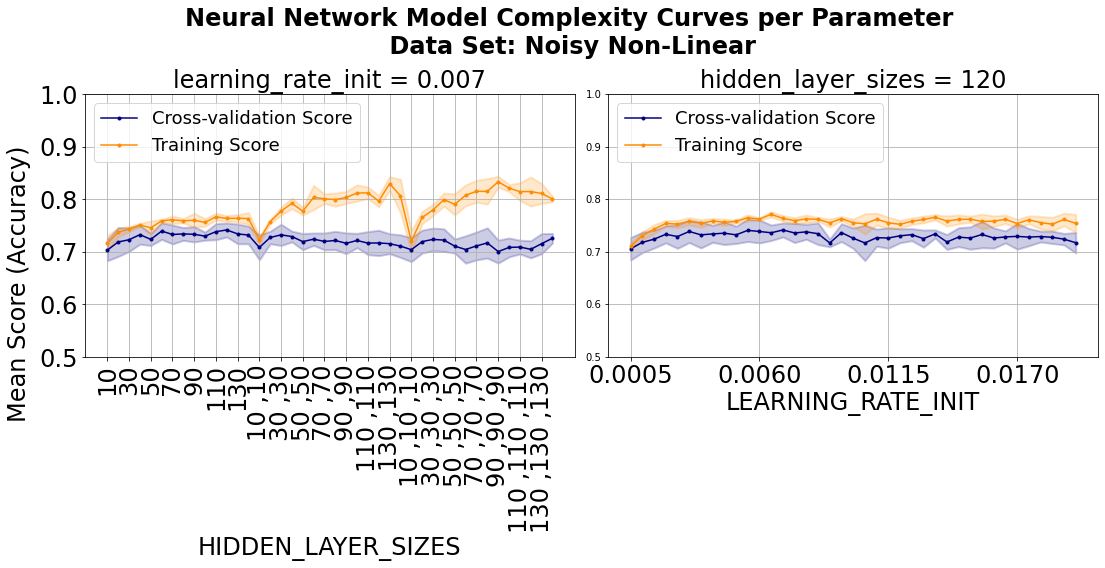

In [19]:

common_grid_search_analysis.plot_grid_search_model_complexity(gs_results, PLOT_SAVE_LOCATION, ALGO=ALGO, DATASET=DATASET, tick_spacing=[2,11], ylim=ylim)

/home/intuision/Documents/richard/SupervisedLearning_Project_Code/common_grid_search_analysis.py:470: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x = np.array(np.array(param_values[plot_param])[mask])


Plot saved as:  Figures/Noisy_Non-Linear_Neural Network_GS_Times_hidden_layer_sizes_learning_rate_init.png


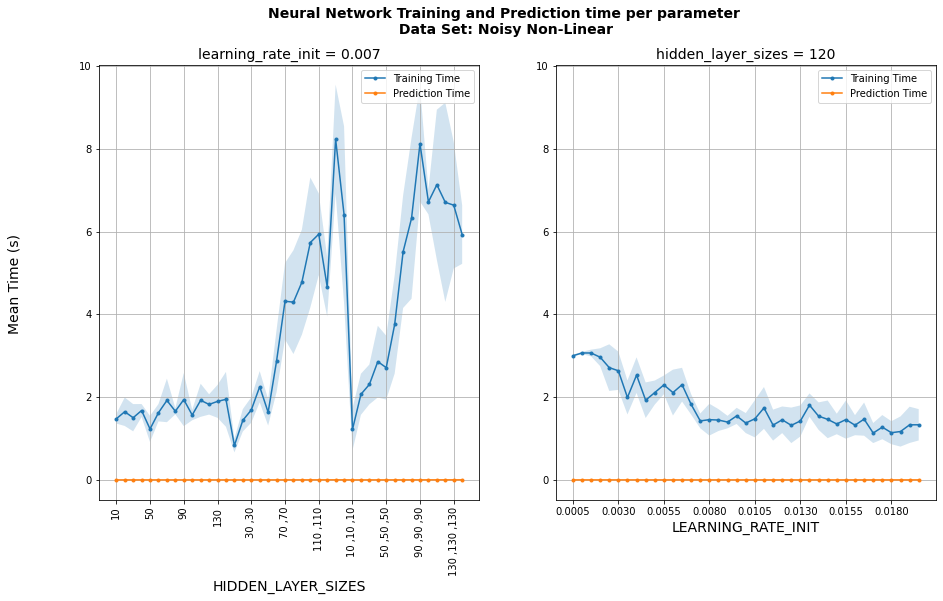

In [20]:
common_grid_search_analysis.plot_grid_search_training_times(gs_results, PLOT_SAVE_LOCATION, ALGO, DATASET, tick_spacing=[4, 5])

{'learning_rate_init': 0.0015, 'hidden_layer_sizes': [80]}
Plot saved as:  Figures/Noisy_Non-Linear_Neural Network_GS_ModelComplexity_hidden_layer_sizes_learning_rate_init.png


/home/intuision/Documents/richard/SupervisedLearning_Project_Code/common_grid_search_analysis.py:124: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x = np.array(np.array(param_values[plot_param])[mask])


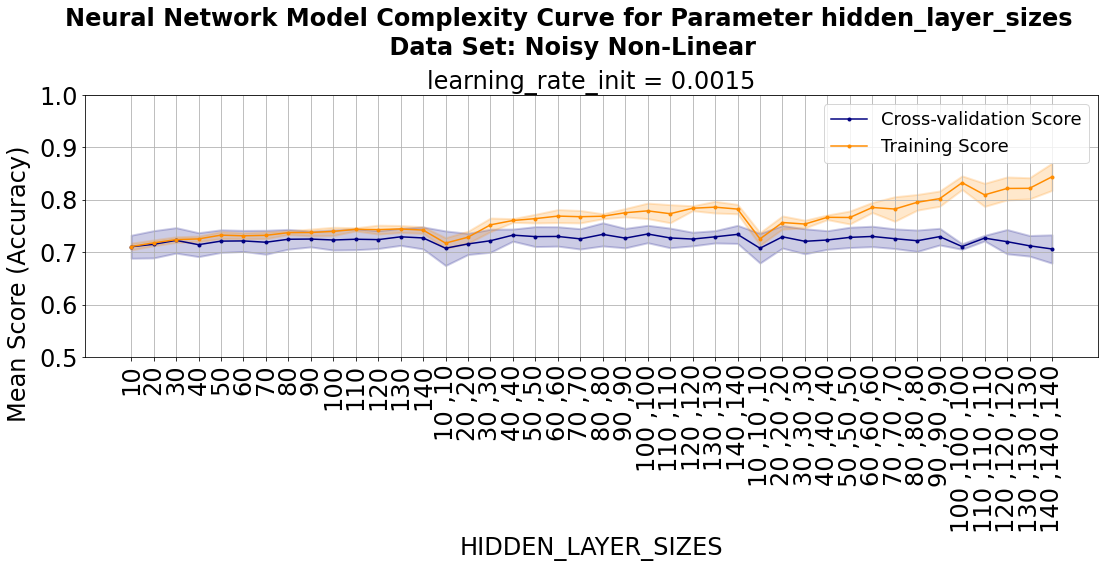

Plot saved as:  Figures/Noisy_Non-Linear_Neural Network_GS_ModelComplexity_hidden_layer_sizes_learning_rate_init.png


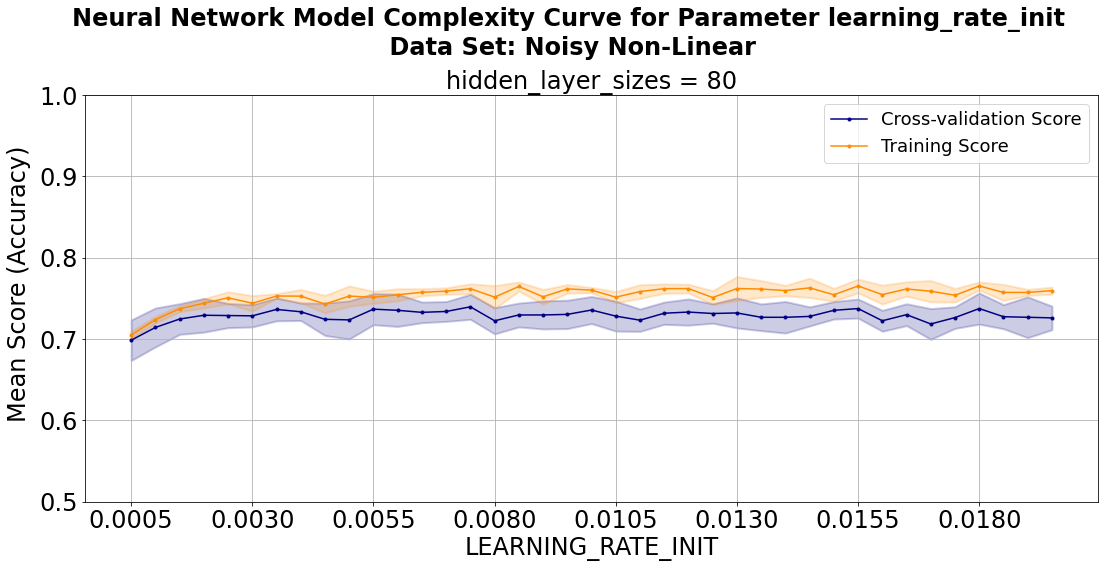

In [21]:
unused_params = {'learning_rate_init':learning_rate_init[2], 'hidden_layer_sizes': [80]}
print(unused_params)
common_grid_search_analysis.plot_grid_search_model_complexity_1param(gs_results, 'hidden_layer_sizes', PLOT_SAVE_LOCATION, ALGO, DATASET, unused_params_value_dict=unused_params, ylim=ylim)
common_grid_search_analysis.plot_grid_search_model_complexity_1param(gs_results, 'learning_rate_init', PLOT_SAVE_LOCATION, ALGO, DATASET, unused_params_value_dict=unused_params, tick_spacing=5, ylim=ylim)

In [22]:
final_parameters = {'batch_size': 64, 'learning_rate_init': 0.0015, 'hidden_layer_sizes': [80]}

In [23]:
# Final Learning Curve
train_sizes, train_scores, test_scores, fit_times, score_times\
= TrainingCurves.perform_learning_curve(MLPClassifier(**final_parameters), X_train, y_train, "accuracy")

/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/hom

/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/hom

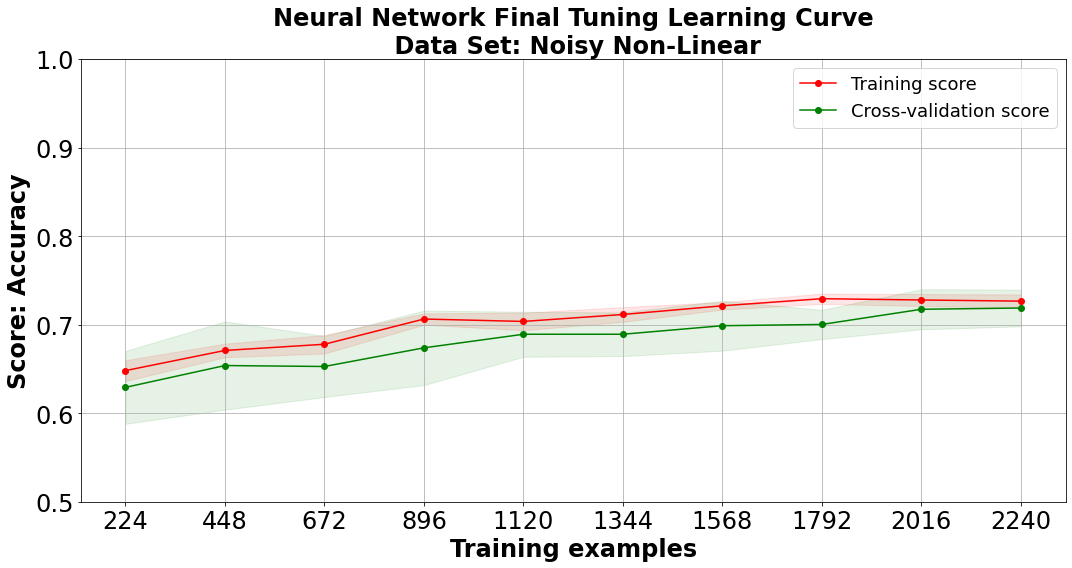

In [24]:
TrainingCurves.plot_learning_curve(train_scores, test_scores, train_sizes, final_title, ylim=ylim)

In [25]:
scores_train, scores_test = loss_curve(np.array(X_train), np.array(y_train), MLPClassifier(**final_parameters))

Running Epochs: 0 1 2 3 4 

/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample siz

5 6 7 8 9 

/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample siz

10 11 12 13 14 

/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample siz

15 16 17 18 19 

/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample siz

20 21 22 23 24 

/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample siz

25 26 27 28 29 

/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample siz

30 31 32 33 34 

/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample siz

35 36 37 38 39 

/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample siz

40 41 42 43 44 

/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample siz

45 46 47 48 49 

/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample siz

50 51 52 53 54 

/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample siz

55 56 57 58 59 

/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample siz

60 61 62 63 64

/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample siz

 65 66 67 68

/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample siz

 69 70 71 

/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample siz

72 73 74 75 

/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample siz

76 77 78 79 80

/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample siz

 81 82 83 84

/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample siz

 85 86 87 

/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample siz

88 89 90 91 

/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample siz

92 93 94 95 96

/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample siz

 97 98 99 

/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample siz

100 101 102 103 

/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample siz

104 105 106 107 

/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample siz

108 109 110 111 

/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample siz

112 113 114 115 

/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample siz

116 117 118 119 

/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample siz

120 121 122 123 

/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample siz

124 125 126 127 

/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample siz

128 129 130 131 

/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample siz

132 133 134 135 

/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample siz

136 137 138 139 

/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample siz

140 141 142 143 

/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample siz

144 145 146 147 

/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample siz

148 149 150 151 

/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample siz

152 153 154 155 

/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample siz

156 157 158 159 

/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample siz

160 161 162 163 

/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample siz

164 165 166 167 

/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample siz

168 169 170 171 

/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample siz

172 173 174 175 

/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample siz

176 177 178 179 

/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample siz

180 181 182 183 

/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample siz

184 185 186 187 

/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample siz

188 189 190 191 

/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample siz

192 193 194 195 

/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample siz

196 197 198 199 

/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample siz

200 201 202 203 

/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample siz

204 205 206 207 

/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample siz

208 209 210 211 

/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample siz

212 213 214 215 

/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample siz

216 217 218 219 

/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample siz

220 221 222 223 

/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample siz

224 225 226 227 

/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample siz

228 229 230 231 

/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample siz

232 233 234 235 

/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample siz

236 237 238 239 

/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample siz

240 241 242 243 

/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample siz

244 245 246 247 

/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample siz

248 249 250 251 

/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample siz

252 253 254 255 

/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample siz

256 257 258 259 

/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample siz

260 261 262 263 

/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample siz

264 265 266 267 

/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample siz

268 269 270 271 

/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample siz

272 273 274 275 

/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample siz

276 277 278 279 

/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample siz

280 281 282 283 

/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample siz

284 285 286 287 

/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample siz

288 289 290 291 

/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample siz

292 293 294 295 

/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample siz

296 297 298 299 

/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample siz

300 301 302 303 

/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample siz

304 305 306 307 

/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample siz

308 309 310 311 

/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample siz

312 313 314 315 

/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample siz

316 317 318 319 

/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample siz

320 321 322 323 

/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample siz

324 325 326 327 

/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample siz

328 329 330 331 

/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample siz

332 333 334 335 

/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample siz

336 337 338 339 

/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample siz

340 341 342 343 

/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample siz

344 345 346 347 

/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample siz

348 349 350 351 

/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample siz

352 353 354 355 

/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample siz

356 357 358 359 

/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample siz

360 361 362 363 

/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample siz

364 365 366 367 

/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample siz

368 369 370 371 

/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample siz

372 373 374 375 

/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample siz

376 377 378 379 

/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample siz

380 381 382 383 

/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample siz

384 385 386 387 

/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample siz

388 389 390 391 

/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample siz

392 393 394 395 

/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample siz

396 397 398 399 

/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample siz

400 401 402 403 

/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample siz

404 405 406 407 

/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample siz

408 409 410 411 

/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample siz

412 413 414 415 

/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample siz

416 417 418 419 

/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample siz

420 421 422 423 

/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample siz

424 425 426 427 

/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample siz

428 429 430 431 

/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample siz

432 433 434 435 

/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample siz

436 437 438 439 

/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample siz

440 441 442 443 

/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample siz

444 445 446 447 

/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample siz

448 449 450 451 

/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample siz

452 453 454 455 

/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample siz

456 457 458 459 

/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample siz

460 461 462 463 

/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample siz

464 465 466 467 

/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample siz

468 469 470 471 

/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample siz

472 473 474 475 

/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample siz

476 477 478 479 

/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample siz

480 481 482 483 

/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample siz

484 485 486 487 

/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample siz

488 489 490 491 

/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample siz

492 493 494 495 

/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample siz

496 497 498 499 


/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample siz

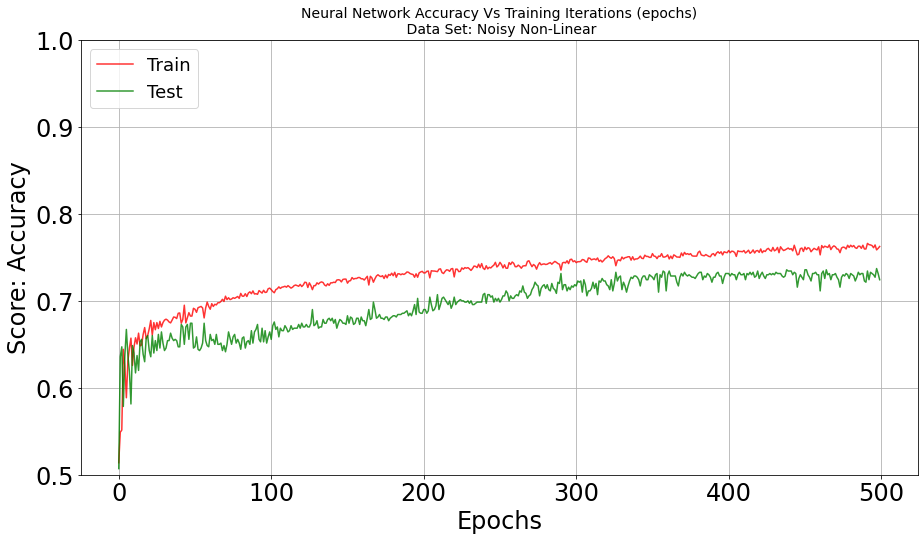

In [26]:
plot_loss_curve(scores_train, scores_test, ALGO, DATASET, ylim=ylim)

In [27]:
print("Default Fit Time: {} seconds".format(round(np.mean(default_fit_times, axis=1)[-1], 3)))
print("Default Predict Time {} seconds".format(round(np.mean(default_score_times, axis=1)[-1], 3)))
print()
print("Final Fit Time: {} seconds".format(round(np.mean(fit_times, axis=1)[-1], 3)))
print("Final Predict Time: {} seconds".format(round(np.mean(score_times, axis=1)[-1], 3)))


Default Fit Time: 1.382 seconds
Default Predict Time 0.001 seconds

Final Fit Time: 1.871 seconds
Final Predict Time: 0.001 seconds


In [28]:
clf = MLPClassifier(**final_parameters)
clf.fit(X_train, y_train)
print("Train Accuracy: {}%".format(round(clf.score(X_train, y_train)*100, 1)))
print("Test Accuracy: {}%".format(round(clf.score(X_test, y_test)*100, 1)))


Train Accuracy: 72.9%
Test Accuracy: 69.1%


/home/intuision/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [29]:
print("Correct Non Noisy Test Accuracy {}%".format(round(clf.score(X_test, y_test_non_noisy)*100, 1)))

Correct Non Noisy Test Accuracy 80.3%
